In [ ]:
# SVM for Titanic Dataset
#Step 1: Load the Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the dataset 
file_path = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\titanic_dataset.csv"
df = pd.read_csv(file_path)
# Display basic information
print("Dataset Information")
print(df.info())
print("\nFirst 5 rows")
print(df.head())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

First 5 rows
   survived  pclass     sex   age  sibsp  parch     fare embarked  cla

In [ ]:
#Step 2: Handle Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())
#Fill missing numerical values with the median
df.fillna(df.median(numeric_only = True), inplace=True)
# Fill missing categorical values with the mode (if any)
for col in df.select_dtypes(include = ['object']):
    df[col].fillna(df[col].mode()[0], inplace = True)


Checking for missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


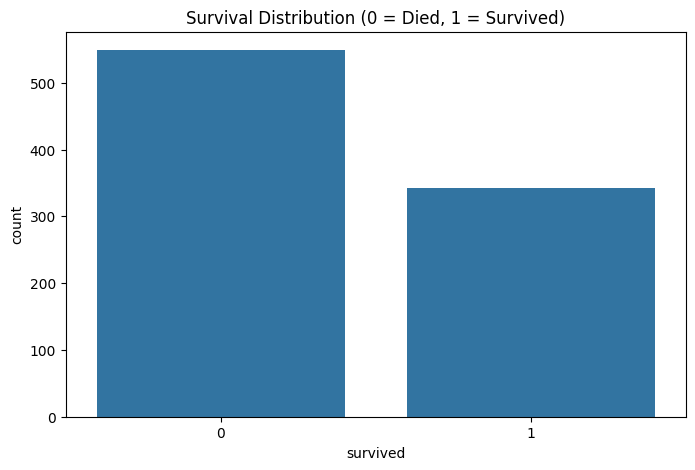

In [11]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'survived', data=df)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

In [13]:
from sklearn.impute import SimpleImputer
#Impute Age with median 
age_imputer = SimpleImputer(strategy = 'median')
df['age'] = age_imputer.fit_transform(df[['age']])


# Impute Embarked with most frequent value
#embarked_imputer = SimpleImputer(strategy='most_frequent')
df['embarked']= SimpleImputer(strategy = 'most_frequent').fit_transform(df[['embarked']]).ravel()

#Drop Cabin 
df.drop(columns = ['deck'], inplace = True)

In [14]:
print("\nRemaining Missing Values: ")
print(df.isnull().sum())


Remaining Missing Values: 
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [15]:
# Encoding Categorical Feature

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['embarked'] = le_embarked.fit_transform(df['embarked'])


In [16]:
# #drop irrelevant features 
df.drop(columns =['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace = True)

print("\nData After Preprocessing: ")
display(df.head())


Data After Preprocessing: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [17]:
#Separate feature and target variable

x= df.drop(columns = ['survived'])
y = df['survived']

In [18]:

# Step 4: Apply Standard Scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

# Step 5: Split Data into Traning and Testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

# Step 6: (Modified): Train a SVM Classifier
from sklearn.svm import SVC

print("\nTraining SVM Classifier................")
svm_model = SVC(kernel = 'linear', random_state= 42)
svm_model.fit(x_train, y_train)

#Step 7: Model Evaluation for SVM

y_pred_svm = svm_model.predict(x_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy: {svm accuracy:.2f}")

# Classification Report
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

#Confusion Matrix
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))









Training SVM Classifier................

SVM Model Accuracy: {svm accuracy:.2f}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


SVM Confusion Matrix:
[[134  23]
 [ 33  78]]
